In [ ]:
# !wget -q --show-progress https://github.com/KNODIS-Research-Group/deep-variational-models-for-collaborative-filtering/blob/main/datasets/ft.csv
# !unzip ft.zip

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Model, Sequential
from keras.layers import Embedding, Flatten, Input, Dropout, Dense, Concatenate, Dot, Lambda
from keras.optimizers import Adam
from keras import backend as K

from sklearn.metrics import precision_score, recall_score, ndcg_score, mean_absolute_error, mean_squared_error, r2_score

In [ ]:
dataset = 'ft'
latent_dim = 5
like_threshold = 3
steps_per_epoch = None

deepmf_epochs = 25
ncf_epochs = 15
neumf_epochs = 10
vdeepmf_epochs = 15
vncf_epochs = 7

In [ ]:
df = pd.read_csv('/content/ft.csv', delimiter = ',')

num_users = df.user.max() + 1
num_items = df.item.max() + 1

X = df[['user', 'item']].to_numpy()
y = df[['rating']].to_numpy()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = [X_train[:,0], X_train[:,1]]
X_test = [X_test[:,0], X_test[:,1]]

In [ ]:
X_train

[array([ 328, 1488, 1315, ...,  583,   43,  773]),
 array([ 56, 474, 325, ..., 326, 502, 475])]

DEEPMF


In [ ]:
user_input = Input(shape=[1])
user_embedding = Embedding(num_users, latent_dim)(user_input)
user_vec = Flatten()(user_embedding)

item_input = Input(shape=[1])
item_embedding = Embedding(num_items, latent_dim)(item_input)
item_vec = Flatten()(item_embedding)

dot = Dot(axes=1)([item_vec, user_vec])

DeepMF = Model([user_input, item_input], dot)

In [ ]:
with tf.device('/GPU:1'):
    DeepMF.compile(optimizer='adam', metrics=['mae'], loss='mean_squared_error')
    DeepMF.summary()

    deepmf_report = DeepMF.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=deepmf_epochs, steps_per_epoch=steps_per_epoch, verbose=1)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_6             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_7 (Embedding)   │ (None, 1, 5)           │         10,355 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_6 (Embedding)   │ (None, 1, 5)           │          7,540 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_7 (Flatten)       │ (None, 5)              │              0 │ embedding_7[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_6 (Flatten)       │ (None, 5)              │              0 │ embedding_6[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dot_2 (Dot)               │ (None, 1)              │              0 │ flatten_7[0][0],       │
│                           │                        │                │ flatten_6[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 17,895 (69.90 KB)

 Trainable params: 17,895 (69.90 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
888/888 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 9.7593 - mae: 2.9862 - val_loss: 8.0211 - val_mae: 2.6687
Epoch 2/25
888/888 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 6.5152 - mae: 2.3431 - val_loss: 3.4755 - val_mae: 1.5284
Epoch 3/25
888/888 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 2.9595 - mae: 1.3543 - val_loss: 2.4771 - val_mae: 1.1744
Epoch 4/25
888/888 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 2.1921 - mae: 1.0840 - val_loss: 2.1265 - val_mae: 1.0633
Epoch 5/25
888/888 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.8887 - mae: 0.9914 - val_loss: 1.9152 - val_mae: 1.0016
Epoch 6/25
888/888 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6267 - mae: 0.9198 - val_loss: 1.7680 - val_mae: 0.9608
Epoch 7/25
888/888 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.4650 - mae: 0.8753 - val_loss: 1.6569 - val_mae: 0.9298
Epoch 8/25
888/888 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.3563 - mae: 0.8462 - val_loss: 1.5697 - val_mae: 0.9038
Epoch 9/25
888/888 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - lo

NCF


In [ ]:
item_input = Input(shape=[1], name='item-input')
item_embedding = Embedding(num_items, latent_dim, name='item-embedding')(item_input)
item_vec = Flatten(name='item-flatten')(item_embedding)

user_input = Input(shape=[1], name='user-input')
user_embedding = Embedding(num_users, latent_dim, name='user-embedding')(user_input)
user_vec = Flatten(name='user-flatten')(user_embedding)

concat = Concatenate(axis=1, name='item-user-concat')([item_vec, user_vec])
fc_1 = Dense(70, name='fc-1', activation='relu')(concat)
fc_1_dropout = Dropout(0.5, name='fc-1-dropout')(fc_1)
fc_2 = Dense(30, name='fc-2', activation='relu')(fc_1_dropout)
fc_2_dropout = Dropout(0.4, name='fc-2-dropout')(fc_2)
fc_3 = Dense(1, name='fc-3', activation='relu')(fc_2_dropout)

NCF = Model([user_input, item_input], fc_3)

In [ ]:
with tf.device('/GPU:1'):
    NCF.compile(optimizer='adam', metrics=['mae'], loss='mean_squared_error')
    NCF.summary()

    ncf_report = NCF.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=ncf_epochs, steps_per_epoch=steps_per_epoch, verbose=1)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ item-input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user-input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ item-embedding            │ (None, 1, 5)           │         10,355 │ item-input[0][0]       │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user-embedding            │ (None, 1, 5)           │          7,540 │ user-input[0][0]       │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ item-flatten (Flatten)    │ (None, 5)              │              0 │ item-embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user-flatten (Flatten)    │ (None, 5)              │              0 │ user-embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ item-user-concat          │ (None, 10)             │              0 │ item-flatten[0][0],    │
│ (Concatenate)             │                        │                │ user-flatten[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fc-1 (Dense)              │ (None, 70)             │            770 │ item-user-concat[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fc-1-dropout (Dropout)    │ (None, 70)             │              0 │ fc-1[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fc-2 (Dense)              │ (None, 30)             │          2,130 │ fc-1-dropout[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fc-2-dropout (Dropout)    │ (None, 30)             │              0 │ fc-2[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fc-3 (Dense)              │ (None, 1)              │             31 │ fc-2-dropout[0][0]     │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 20,826 (81.35 KB)

 Trainable params: 20,826 (81.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
888/888 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 3.3330 - mae: 1.4651 - val_loss: 0.7120 - val_mae: 0.6791
Epoch 2/15
888/888 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.0684 - mae: 0.8312 - val_loss: 0.7088 - val_mae: 0.6811
Epoch 3/15
888/888 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.9365 - mae: 0.7732 - val_loss: 0.6674 - val_mae: 0.6378
Epoch 4/15
888/888 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8142 - mae: 0.7214 - val_loss: 0.6717 - val_mae: 0.6445
Epoch 5/15
888/888 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.7346 - mae: 0.6830 - val_loss: 0.6710 - val_mae: 0.6386
Epoch 6/15
888/888 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6815 - mae: 0.6540 - val_loss: 0.6714 - val_mae: 0.6355
Epoch 7/15
888/888 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6297 - mae: 0.6267 - val_loss: 0.6737 - val_mae: 0.6397
Epoch 8/15
888/888 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5894 - mae: 0.6013 - val_loss: 0.6684 - val_mae: 0.6304
Epoch 9/15
888/888 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - lo

VDEEPMF


In [ ]:
batch_size = 32
latent_dim = 13  # Example latent dimension

import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dense, Lambda, Flatten, Dropout, Dot
from tensorflow.keras.models import Model

def sampling(args):
    z_mean, z_var = args
    epsilon = tf.random.normal(shape=tf.shape(z_mean), mean=0.0, stddev=1.0)
    return z_mean + tf.exp(0.5 * z_var) * epsilon  # Scaled variance for stability

# User Input
user_input = Input(shape=[1])
user_embedding = Embedding(num_users, latent_dim, embeddings_initializer='random_uniform')(user_input)
user_embedding_mean = Dense(latent_dim)(user_embedding)
user_embedding_var = Dense(latent_dim)(user_embedding)
user_embedding_z = Lambda(sampling, output_shape=(latent_dim,))([user_embedding_mean, user_embedding_var])
user_vec = Flatten()(user_embedding_z)

# Item Input
item_input = Input(shape=[1])
item_embedding = Embedding(num_items, latent_dim, embeddings_initializer='random_uniform')(item_input)
item_embedding_mean = Dense(latent_dim)(item_embedding)
item_embedding_var = Dense(latent_dim)(item_embedding)
item_embedding_z = Lambda(sampling, output_shape=(latent_dim,))([item_embedding_mean, item_embedding_var])
item_vec = Flatten()(item_embedding_z)

# Dot Product
dot = Dot(axes=1)([item_vec, user_vec])

# Model
VDeepMF = Model([user_input, item_input], dot)



In [ ]:
with tf.device('/GPU:1'):
    VDeepMF.compile(optimizer='adam', metrics=['mae'], loss='mean_squared_error')
    VDeepMF.summary()

    vdeepmf_report = VDeepMF.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=vdeepmf_epochs, batch_size=batch_size, steps_per_epoch=steps_per_epoch, verbose=1)

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_8             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_9 (Embedding)   │ (None, 1, 13)          │         26,923 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_8 (Embedding)   │ (None, 1, 13)          │         19,604 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 1, 13)          │            182 │ embedding_9[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 1, 13)          │            182 │ embedding_9[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 1, 13)          │            182 │ embedding_8[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 1, 13)          │            182 │ embedding_8[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_5 (Lambda)         │ (None, 13)             │              0 │ dense_10[0][0],        │
│                           │                        │                │ dense_11[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_4 (Lambda)         │ (None, 13)             │              0 │ dense_8[0][0],         │
│                           │                        │                │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_9 (Flatten)       │ (None, 13)             │              0 │ lambda_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_8 (Flatten)       │ (None, 13)             │              0 │ lambda_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dot_3 (Dot)               │ (None, 1)              │              0 │ flatten_9[0][0],       │
│                           │                        │                │ flatten_8[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 47,255 (184.59 KB)

 Trainable params: 47,255 (184.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
888/888 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 19.3864 - mae: 3.5997 - val_loss: 10.5874 - val_mae: 2.7098
Epoch 2/15
888/888 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 6.9179 - mae: 2.1086 - val_loss: 2.9211 - val_mae: 1.3428
Epoch 3/15
888/888 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.5027 - mae: 1.2374 - val_loss: 1.7021 - val_mae: 1.0128
Epoch 4/15
888/888 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.4336 - mae: 0.9280 - val_loss: 1.2390 - val_mae: 0.8507
Epoch 5/15
888/888 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.0715 - mae: 0.7991 - val_loss: 1.0559 - val_mae: 0.7830
Epoch 6/15
888/888 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.8534 - mae: 0.7161 - val_loss: 0.8904 - val_mae: 0.7217
Epoch 7/15
888/888 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7258 - mae: 0.6611 - val_loss: 0.8419 - val_mae: 0.7003
Epoch 8/15
888/888 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6661 - mae: 0.6314 - val_loss: 0.7913 - val_mae: 0.6769
Epoch 9/15
888/888 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - 

VNCF

In [ ]:
batch_size = 32
latent_dim = 13  # Example latent dimension

import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dense, Lambda, Flatten, Dropout, Dot
from tensorflow.keras.models import Model

def sampling(args):
    z_mean, z_var = args
    epsilon = tf.random.normal(shape=tf.shape(z_mean), mean=0.0, stddev=1.0)
    return z_mean + tf.exp(0.5 * z_var) * epsilon  # Scaled variance for stability

# User Input
user_input = Input(shape=[1])
user_embedding = Embedding(num_users, latent_dim, embeddings_initializer='random_uniform')(user_input)
user_embedding_mean = Dense(latent_dim)(user_embedding)
user_embedding_var = Dense(latent_dim)(user_embedding)
user_embedding_z = Lambda(sampling, output_shape=(latent_dim,))([user_embedding_mean, user_embedding_var])
user_vec = Flatten()(user_embedding_z)

# Item Input
item_input = Input(shape=[1])
item_embedding = Embedding(num_items + 1, latent_dim, embeddings_initializer='random_uniform')(item_input)
item_embedding_mean = Dense(latent_dim)(item_embedding)
item_embedding_var = Dense(latent_dim)(item_embedding)
item_embedding_z = Lambda(sampling, output_shape=(latent_dim,))([item_embedding_mean, item_embedding_var])
item_vec = Flatten()(item_embedding_z)

concat = Concatenate(axis=1)([item_vec, user_vec])

fc_1 = Dense(80, name='fc-1', activation='relu')(concat)
fc_1_dropout = Dropout(0.6, name='fc-1-dropout')(fc_1)
fc_2 = Dense(25, name='fc-2', activation='relu')(fc_1_dropout)
fc_2_dropout = Dropout(0.4, name='fc-2-dropout')(fc_2)
fc_3 = Dense(1, name='fc-3', activation='relu')(fc_2_dropout)

VNCF = Model([user_input, item_input], fc_3)

In [ ]:
with tf.device('/GPU:1'):
    VNCF.compile(optimizer='adam', metrics=['mae'], loss='mean_squared_error')
    VNCF.summary()

    vncf_report = VNCF.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=vncf_epochs, batch_size=batch_size, steps_per_epoch=steps_per_epoch, verbose=1)

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11            │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_10            │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_11 (Embedding)  │ (None, 1, 13)          │         26,936 │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_10 (Embedding)  │ (None, 1, 13)          │         19,604 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 1, 13)          │            182 │ embedding_11[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 1, 13)          │            182 │ embedding_11[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 1, 13)          │            182 │ embedding_10[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 1, 13)          │            182 │ embedding_10[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_7 (Lambda)         │ (None, 13)             │              0 │ dense_14[0][0],        │
│                           │                        │                │ dense_15[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_6 (Lambda)         │ (None, 13)             │              0 │ dense_12[0][0],        │
│                           │                        │                │ dense_13[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_11 (Flatten)      │ (None, 13)             │              0 │ lambda_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_10 (Flatten)      │ (None, 13)             │              0 │ lambda_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 26)             │              0 │ flatten_11[0][0],      │
│ (Concatenate)             │                        │                │ flatten_10[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fc-1 (Dense)              │ (None, 80)             │          2,160 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fc-1-dropout (Dropout)    │ (None, 80)             │              0 │ fc-1[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fc-2 (Dense)              │ (None, 25)             │          2,025 │ fc-1-dropout[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fc-2-dropout (Dropout)    │ (None, 25)             │              0 │ fc-2[0][0]             │
├──────────────────────

 Total params: 51,479 (201.09 KB)

 Trainable params: 51,479 (201.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/7
888/888 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 2.5939 - mae: 1.3077 - val_loss: 1.0453 - val_mae: 0.8699
Epoch 2/7
888/888 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.3237 - mae: 0.9355 - val_loss: 0.9462 - val_mae: 0.8254
Epoch 3/7
888/888 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.0690 - mae: 0.8355 - val_loss: 0.8316 - val_mae: 0.7530
Epoch 4/7
888/888 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.9137 - mae: 0.7670 - val_loss: 0.7349 - val_mae: 0.6941
Epoch 5/7
888/888 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.7741 - mae: 0.7033 - val_loss: 0.7116 - val_mae: 0.6803
Epoch 6/7
888/888 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7056 - mae: 0.6651 - val_loss: 0.6863 - val_mae: 0.6578
Epoch 7/7
888/888 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.6586 - mae: 0.6405 - val_loss: 0.6770 - val_mae: 0.6441


METRICS


In [ ]:
methods = ['vdeepmf', 'deepmf', 'vncf', 'ncf']

In [ ]:
preds = pd.DataFrame()

preds['user'] = X_test[0]
preds['item'] = X_test[1]

preds['y_test'] = y_test

In [ ]:
y_true = preds['y_test'].to_numpy()

In [ ]:
preds['deepmf'] = DeepMF.predict(X_test)

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
preds['ncf'] = NCF.predict(X_test)

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
n_repeats = 10

In [ ]:
predictions = None

for i in range(n_repeats):
    if i == 0:
        predictions = VDeepMF.predict(X_test)
    else:
        predictions = np.append(predictions, VDeepMF.predict(X_test), axis=1)

preds['vdeepmf'] = np.mean(predictions, axis=1)

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
predictions = None

for i in range(n_repeats):
    if i == 0:
        predictions = VNCF.predict(X_test)
    else:
        predictions = np.append(predictions, VNCF.predict(X_test), axis=1)

preds['vncf'] = np.mean(predictions, axis=1)

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Quality of predictions

In [ ]:
print('MAE:')
for m in methods:
    print('-', m, ':', mean_absolute_error(preds['y_test'], preds[m]))

print('MSD:')
for m in methods:
    print('-', m, ':', mean_squared_error(preds['y_test'], preds[m]))

print('R2:')
for m in methods:
    print('-', m, ':', r2_score(preds['y_test'], preds[m]))

MAE:
- vdeepmf : 0.6356630331467601
- deepmf : 0.7310191996388274
- vncf : 0.6378923620971463
- ncf : 0.6293733469750414
MSD:
- vdeepmf : 0.6937641819925373
- deepmf : 1.030034000077425
- vncf : 0.6648216658185933
- ncf : 0.6839479176562855
R2:
- vdeepmf : 0.1889648850951211
- deepmf : -0.20414654617858718
- vncf : 0.22279972053351726
- ncf : 0.20044044881047918


Quality of recommendations

In [ ]:
recommendations = {}

for m in methods:
    recommendations[m] = {}

X = preds[['user', 'item']].to_numpy()
for user_id in np.unique(X[:,0]):
    indices = np.where(X[:,0] == user_id)[0]

    for m in methods:
        user_pred = np.array([preds[m].to_numpy()[i] for i in indices])
        user_rec = [indices[pos] for pos in np.argsort(user_pred)[::-1]]
        recommendations[m][user_id] = user_rec

In [ ]:
num_recommendations = [2,3,4,5,6,7,8,9,10]

#### Precision, recall and F1

In [ ]:
def recommender_precision_recall(recommendations, y_true, y_pred, N, threshold):
    precision = 0
    recall = 0
    count = 0

    for user_id, indices in recommendations.items():

        valid_user = False
        rec_true = np.zeros(len(indices))
        rec_pred = np.zeros(len(indices))

        for i, index in enumerate(indices):

            if y_true[index] >= threshold:
                rec_true[i] = 1
                valid_user = True

            if i < N and y_pred[index] >= threshold:
                rec_pred[i] = 1

        if valid_user:
            precision += precision_score(rec_true, rec_pred, zero_division=0)
            recall += recall_score(rec_true, rec_pred)
            count += 1

    return precision/count, recall/count

In [ ]:
precision = {}
recall = {}
f1 = {}

for m in methods:
    print(m)

    precision[m] = np.zeros(len(num_recommendations))
    recall[m] = np.zeros(len(num_recommendations))

    for i, n in enumerate(num_recommendations):
        y_pred = preds[m].to_numpy()
        precision[m][i], recall[m][i] = recommender_precision_recall(recommendations[m], y_true, y_pred, n, like_threshold)

    f1[m] = 2 * precision[m] * recall[m] / (precision[m] + recall[m])

vdeepmf
deepmf
vncf
ncf


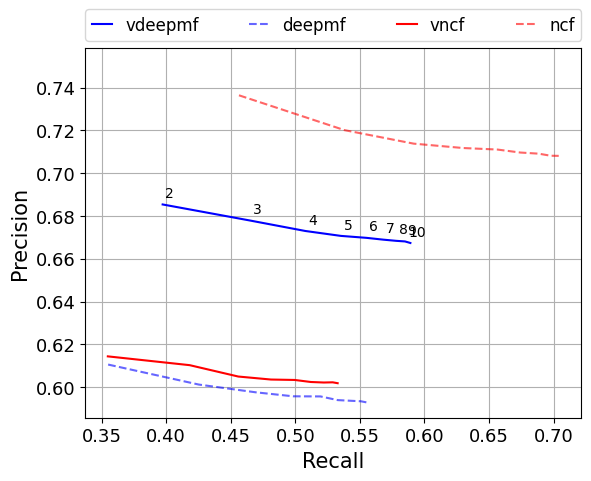

In [ ]:
for m in methods:
    c = 'blue' if 'deepmf' in m else 'red'
    alpha = 1 if m[0] == 'v' else 0.6
    ls = '-' if m[0] == 'v' else '--'

    plt.plot(recall[m], precision[m], c=c, ls=ls, alpha=alpha, label=m)

    if m == 'vdeepmf':
        for i,(r,p) in enumerate(zip(recall[m], precision[m])):
            plt.annotate(num_recommendations[i], (r,p), textcoords="offset points", xytext=(5,5), ha='center')

plt.xlabel('Recall', fontsize=15);
plt.ylabel('Precision', fontsize=15)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.legend(bbox_to_anchor=(0,1.02,1,0.2), fontsize=12, loc="lower left", mode="expand", borderaxespad=0, ncol=len(methods), handlelength=1.2)

plt.grid(True)

ylim_min, ylim_max = plt.ylim()
plt.ylim((ylim_min, ylim_max * 1.02))

plt.savefig('precision-recall.png', dpi=300)

plt.show()

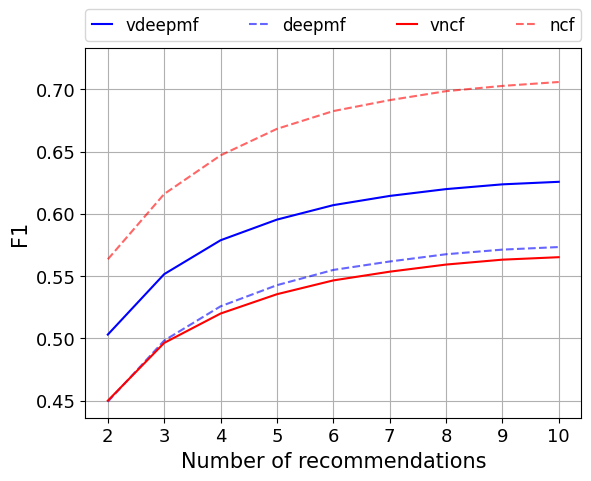

In [ ]:
for m in methods:
    c = 'blue' if 'deepmf' in m else 'red'
    alpha = 1 if m[0] == 'v' else 0.6
    ls = '-' if m[0] == 'v' else '--'

    plt.plot(num_recommendations, f1[m], c=c, ls=ls, alpha=alpha, label=m)

plt.xlabel('Number of recommendations', fontsize=15);
plt.ylabel('F1', fontsize=15)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.legend(bbox_to_anchor=(0,1.02,1,0.2), fontsize=12, loc="lower left", mode="expand", borderaxespad=0, ncol=len(methods), handlelength=1.2)

plt.grid(True)

ylim_min, ylim_max = plt.ylim()
plt.ylim((ylim_min, ylim_max * 1.02))

plt.savefig('f1.png', dpi=300)

plt.show()

#### Novelty

In [ ]:
def recommender_novelty(recommendations, y_true, y_pred, num_recommendations):
    novelty = np.zeros(len(num_recommendations))
    count = np.zeros(len(num_recommendations))

    bincount = np.bincount(X_test[1])

    for user_id, indices in recommendations.items():
        for i, n in enumerate(num_recommendations):
            for index in indices[:n]:
                item_id = X_test[1][index]
                num_item_ratings = bincount[item_id]
                total_num_ratings = len(X_test[1])
                pi = num_item_ratings / total_num_ratings
                novelty[i] += -math.log(pi,2)
                count[i] += 1

    return novelty/count

vdeepmf
deepmf
vncf
ncf


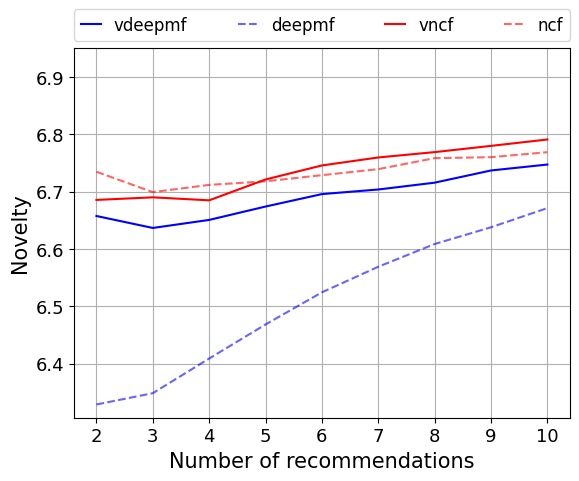

In [ ]:
for m in methods:
    print(m)

    y_pred = preds[m].to_numpy()
    novelty = recommender_novelty(recommendations[m], y_true, y_pred, num_recommendations)

    c = 'blue' if 'deepmf' in m else 'red'
    alpha = 1 if m[0] == 'v' else 0.6
    ls = '-' if m[0] == 'v' else '--'

    plt.plot(num_recommendations, novelty, c=c, ls=ls, alpha=alpha, label=m)

plt.xlabel('Number of recommendations', fontsize=15);
plt.ylabel('Novelty', fontsize=15)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.legend(bbox_to_anchor=(0,1.02,1,0.2), fontsize=12, loc="lower left", mode="expand", borderaxespad=0, ncol=len(methods), handlelength=1.2)

plt.grid(True)

ylim_min, ylim_max = plt.ylim()
plt.ylim((ylim_min, ylim_max * 1.02))

plt.savefig('novelty.png', dpi=300)

plt.show()

#### NDCG

In [ ]:
def recommender_ndcg(recommendations, y_true, y_pred, N):
    ndcg = 0
    count = 0

    for indices in recommendations.values():
        if len(indices) > 1:
            user_true = np.array([y_true[i] for i in indices])
            user_pred = np.array([y_pred[i] for i in indices])

            user_true = np.expand_dims(user_true, axis=0)
            user_pred = np.expand_dims(user_pred, axis=0)

            ndcg += ndcg_score(user_true, user_pred, k=N, ignore_ties=False)
            count += 1

    return ndcg / count

vdeepmf
deepmf
vncf
ncf


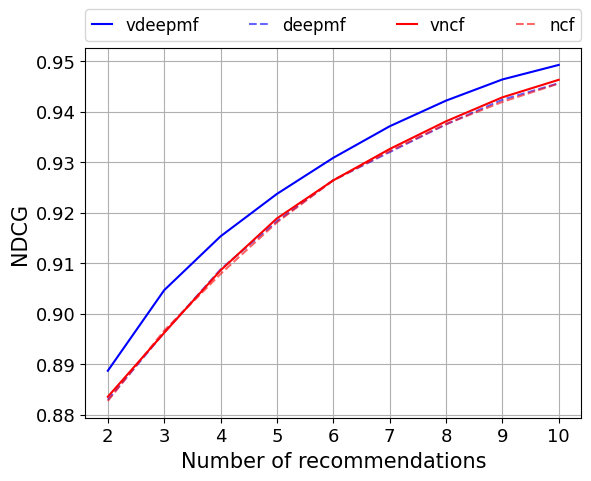

In [ ]:
for m in methods:
    print(m)

    ndcg = np.zeros(len(num_recommendations))

    for i, n in enumerate(num_recommendations):
        y_pred = preds[m].to_numpy()
        ndcg[i] = recommender_ndcg(recommendations[m], y_true, y_pred, n)

    c = 'blue' if 'deepmf' in m else 'red'
    alpha = 1 if m[0] == 'v' else 0.6
    ls = '-' if m[0] == 'v' else '--'

    plt.plot(num_recommendations, ndcg, c=c, ls=ls, alpha=alpha, label=m)

plt.xlabel('Number of recommendations', fontsize=15);
plt.ylabel('NDCG', fontsize=15)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.legend(bbox_to_anchor=(0,1.02,1,0.2), fontsize=12, loc="lower left", mode="expand", borderaxespad=0, ncol=len(methods), handlelength=1.2)

plt.grid(True)

plt.savefig('ndcg.png', dpi=300)

plt.show()